# Discussion 10

Import necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper import experiment2D
from scipy.stats import norm
from ipywidgets import interactive
import ipywidgets as widgets
from pdb import set_trace as st
from matplotlib.ticker import StrMethodFormatter

## Part (a): K-means Could Fail Sometimes (2D Example) ##

In the previous discussion, we learned a powerful method for clustering, K-means. In the following example, we show that K-means could sometimes fail. The k-means algorithm implementation is exactly what you have implented in Discussion 9.

We introduce Expectation–maximization (EM) algorithm in this discussion. In the following example, EM algorithm could successfully recover true data labels.

Note that different colors correspond to different clusters; the black cross represents the mean of each cluster.

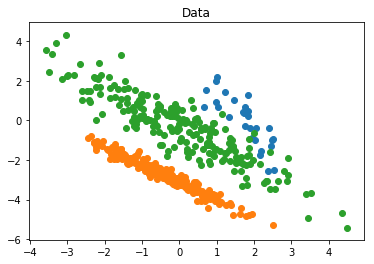

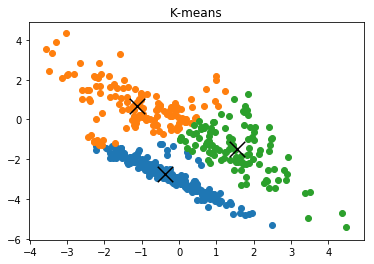

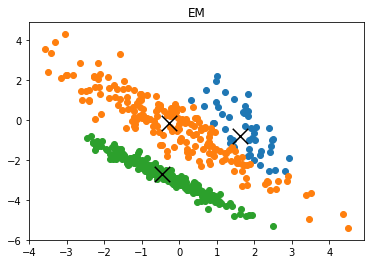

In [2]:
experiment2D(data_seed=11, alg_seed=12312, factor=1, num_samples=500, num_clusters=3)

**Let's initialize differently by changing alg_seed. Will K-means and EM work?**

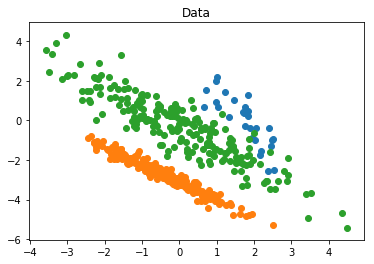

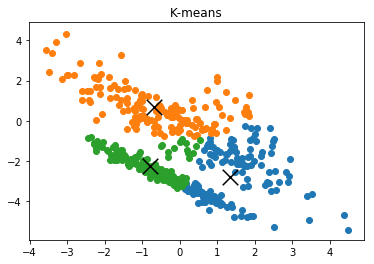

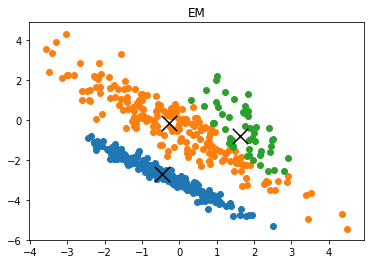

In [3]:
experiment2D(data_seed=11, alg_seed=12, factor=1, num_samples=500, num_clusters=3)

**Further change alg_seed and data_seed and observe which algorithm has better performance?**

If you have time, also play with num_samples and num_clusters. 

## Part (b): Understanding EM (1D Example) ##

Let's understand EM intuitively in this part. First we need to define some auxiliary functions. 

In [4]:
def generate_data(mu_1, mu_2, n_examples, sigma_1 = 0.5, sigma_2 = 0.5):
    # Generate sample data points from 2 distributions: (mu_1, sigma_1) and (mu_2, sigma_2)
    d_1 = np.random.normal(mu_1, sigma_1, n_examples)
    d_2 = np.random.normal(mu_2, sigma_2, n_examples)
    x = np.concatenate([d_1, d_2])
    return d_1, d_2, x

def plot_data(d_1, d_2):
    # Plot scatter plot of data samples, labeled by class
    plt.figure()
    plt.scatter(d_1, np.zeros(len(d_1)), c='b', s=80., marker='+')
    plt.scatter(d_2, np.zeros(len(d_2)), c='r', s=80.)
    plt.title("Sample data using: mu = " + str(mu) + " n_train = " + str(len(d_1)+len(d_2)))
    plt.show()
    return

def plot_data_and_distr(d_1, d_2, mu_1, mu_2, sigma_1=0.5, sigma_2=0.5, title = ""):
    # Plot scatter plot of data samples overlayed with distribution of estimated means: mu_1 and mu_2

    plt.scatter(d_1, np.zeros(len(d_1)), c='b')
    scale = [min(mu_1-3*sigma_1, mu_2-3*sigma_2), max(mu_1+3*sigma_1, mu_2+3*sigma_2)]
    plt.scatter(d_2, np.zeros(len(d_2)), c='r')
    plt.plot([mu_1, -mu_1],[0, 0], 'kx', markersize=20)
    x_axis = np.arange(scale[0], scale[1], 0.001)
    plt.plot(x_axis, norm.pdf(x_axis,mu_1, sigma_1), c='b')
    x_axis = np.arange(scale[0], scale[1], 0.001)
    print("Current mu="+str(mu_1))
    plt.plot(x_axis, norm.pdf(x_axis,mu_2,sigma_2), c='r')
    plt.xlim(-2, 2)
    plt.title(title)
    plt.show()
    
    plt.plot(d_1, np.sign(d_1), "b.")
    plt.plot(d_2, np.sign(d_2), "r.")
    plt.xlim(-2, 2)
    plt.title("Weight contributed to cluster 0")
    plt.show()
    
def plot_data_and_distr_em(d_1, d_2, mu_1, mu_2, data, wi, sigma_1=0.5, sigma_2=0.5, title = ""):
    # Plot scatter plot of data samples overlayed with distribution of estimated means: mu_1 and mu_2
    plt.scatter(d_1, np.zeros(len(d_1)), c='b')
    scale = [min(mu_1-3*sigma_1, mu_2-3*sigma_2), max(mu_1+3*sigma_1, mu_2+3*sigma_2)]
    plt.scatter(d_2, np.zeros(len(d_2)), c='r')
    plt.plot([mu_1, -mu_1],[0, 0], 'kx', markersize=20)
    x_axis = np.arange(scale[0], scale[1], 0.001)
    plt.plot(x_axis, norm.pdf(x_axis,mu_1, sigma_1), c='b')
    x_axis = np.arange(scale[0], scale[1], 0.001)
    print("Current mu="+str(mu_1))
    plt.plot(x_axis, norm.pdf(x_axis,mu_2,sigma_2), c='r')
    plt.xlim(-2, 2)
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.title(title)
    plt.show()
    
    #plt.plot(data[wi>=0], wi[wi>=0], 'b.')
    #plt.plot(data[wi<0], wi[wi<0], 'r.')
    plt.plot(d_1, wi[:len(d_1)], 'b.')
    plt.plot(d_2, wi[len(d_1):], 'r.')
    plt.xlim(-2, 2)
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.title("Weight contributed to cluster 0")
    plt.show()

def process_em(iteration):
    ### You can play with these two parameters
    mu = 0.5   
    rand_seed = 10
    ###
    
    np.random.seed(rand_seed)
    mu_start = 0.1
    n_train = 50
    iteration = int(iteration)
    d_1, d_2, x = generate_data(mu, -mu, n_examples = n_train)
    #plot_data(d_1, d_2)
    mu_em, sigma_em, diff_mu_em, mus_em, ws = em(x, mu_start, mu, iterations=50)

    plot_data_and_distr_em(d_1, d_2, mus_em[iteration], -mus_em[iteration], x, ws[iteration], title="Estimated distribution using EM at iter "+str(iteration))

    print("True mean:{:.3f}, EM (final) estimate:{:.3f}".format(mu, mu_em))
    
def process_kmeans(iteration):
    ### You can play with these two parameters
    mu = 0.5
    rand_seed = 10
    ###
    
    np.random.seed(rand_seed)
    mu_start = 0.1
    n_train = 50
    iteration = int(iteration)
    d_1, d_2, x = generate_data(mu, -mu, n_examples = n_train)
    #plot_data(d_1, d_2)
    mu_k, sigma_k, diff_mu_k, mus_k = kmeans(x, mu_start, mu, iterations=50)

    plot_data_and_distr(d_1, d_2, mus_k[iteration], -mus_k[iteration], title="Estimated distribution using K-means at iter "+str(iteration))

    print("True mean:{:.3f}, EM (final) estimate:{:.3f}".format(mu, mu_k))
def generate_iter_widget():
    return widgets.IntSlider(
        value=0,
        min=0, 
        max=9, 
        step=1,
        description='Iteration',
        continuous_update= False)
def visualize(iteration):
    process_em(iteration)
def visualizek(iteration):
    process_kmeans(iteration)

Let's consider the following one-dimensional mixture model:
\begin{align}
  Z &\sim \text{Bernoulli}(0.5)\\
  X\vert Z=0 &\sim \mathcal{N}(\mu, \sigma^2), \quad \text{and}\\
  X\vert Z=1 &\sim \mathcal{N}(-\mu, \sigma^2),
\end{align}
i.e., $Z$ denotes the label of the Gaussian distribution from which $X$ is drawn.
In other words, we have an equal weighted 2-mixture (since $Z$ takes value
$0$ or $1$ with probability $0.5$ each) of Gaussians, where the variances and means for
both mixtures are unknown.

For simplicity, we set $\sigma=0.5$

***i) K-means*** 

We have implemented this part for you. Since two clusters are centered at $\mu$ and $-\mu$, K-means can be considered using following two steps:

    E-step: Assign each data point to cluster 0 (if it is closer to $\mu$) or cluster 1 (if it is closer to $-\mu$). 
 
    M-step: Update $\mu_0$ and $\mu_1$ based on current data points in the cluster.

Note that in M-step, we set $\mu=\frac{|\mu_0 - \mu_1|}{2}$ for the specific distribution of this problem.

Please take a look at the implementation and understand the procedure.

In [5]:
def kmeans(x, mu, mu_true, sigma = 0.5, iterations = 200):
    # Run the K means algorithm to find the estimated mean of the dataset
    # Note: the original dataset comes from 2 distributions centered at mu and -mu, which this takes into account
    #     with each update
    diff_mu = np.zeros(iterations)
    mus = np.zeros(iterations)
    for i in range(iterations):
        mu_1 = mu
        mu_2 = -mu
        set1 = []
        set2 = []
        #### This is like the E_step ####
        for x_i in x:
            if np.abs(x_i - mu_1) <= np.abs(x_i - mu_2):
                set1.append(x_i)
            else:
                set2.append(x_i)
        #### This is like the M_step ####
        mu_0_new = np.mean(set1)
        mu_1_new = np.mean(set2)
        # Estimates two means and combines them to get mu for the next iteration
        mu = np.abs(len(set1)*mu_0_new - len(set2)*mu_1_new)/(len(set1)+len(set2))
        diff_mu[i]  = np.abs(mu-mu_true)
        mus[i] = mu

    return mu, sigma, diff_mu, mus

Let's run K-means!

In [6]:
interactive_plot = interactive(visualizek,iteration=generate_iter_widget())
interactive_plot
# start with the initial condition

interactive(children=(IntSlider(value=0, continuous_update=False, description='Iteration', max=9), Output()), …

How to interpret the plots?
- Different colors correspond to ground-truth labels. Blue -> cluster 0; red -> cluster 1.
- Upper plot: black cross: current estimated $\mu$ (and $-\mu$). Current estimated distributions are also plotted.
- Lower plot: X-axis: value of each 1D point; Y-axis: weight contributed to cluster 0. 

Pay attention to points near the boundary. Is the "hard assignment" good for this example?

***ii) EM*** 

EM algorithm can be understood as a softer version of K-means

    E-step: For each data point x_i, instead of assigning a label, use a soft version: compute the probablity of each label. 
$$\phi^0_i=\frac{1}{\sigma \sqrt(2\pi)}\exp(-\frac{(x_i-\mu)^2}{2\sigma^2})\propto\exp(-\frac{(x_i-\mu)^2}{2\sigma^2})$$
$$\phi^1_i=\frac{1}{\sigma \sqrt(2\pi)}\exp(-\frac{(x_i+\mu)^2}{2\sigma^2})\propto \exp(-\frac{(x_i+\mu)^2}{2\sigma^2})$$
Using Bayes' rule for the weight contributed to cluster 0.
$$w_i=\frac{\phi^0_i-\phi^1_i}{\phi^0_i+\phi^1_i}$$
    M-step: We can estimate parameter $\mu$ (for cluster 0) based on the ``soft'' probability.
 $$\mu = \sum_i \frac{w_i x_i}{N} $$ where $N$ is the number of data points. Similarly, use $-\mu$ as the mean for cluster 1.
 
 <em> Note: when implementing $\phi$, use what's after $\propto$ as the constant will be cancelled out. <em>

In [7]:
def em(x, mu, mu_true, sigma = 0.5, iterations = 200):
    # Run the EM algorithm to find the estimated mean of the dataset
    # Note: the original dataset comes from 2 distributions centered at mu and -mu, which this takes into account
    #     with each update
    diff_mu = np.zeros(iterations)
    mus = np.zeros(iterations)
    phis = []
    for i in range(iterations):
        
        phi_0 = None
        phi_1 = None
        w = None

        # Hint: use np.exp(-np.square(x-mu)/(2*np.square(sigma)))
        ### start E_step ###
        phi_0 = np.exp(-np.square(x-mu)/(2*np.square(sigma)))
        phi_1 = np.exp(-np.square(x+mu)/(2*np.square(sigma)))
        w = (phi_0-phi_1)/(phi_0 + phi_1)

        ### end E_step ###
        
        mu = None
        # Hint: use (1/len(x))*np.sum(w*x)
        ### start M_step ###
    
        mu = (1/len(x))*np.sum(w*x)
        ### end M_step ###
        diff_mu[i]  = np.abs(mu-mu_true)
        mus[i] = mu

        phis.append((phi_0-phi_1)/(phi_0+phi_1))
    phis = np.array(phis)

    return mu, sigma,diff_mu, mus, phis

Let's look at how learned distributions ($\mu$ from M-step) and label assigment (from E-step) evolves for EM and K-means.

In [8]:
interactive_plot = interactive(visualize,iteration=generate_iter_widget())
interactive_plot

interactive(children=(IntSlider(value=0, continuous_update=False, description='Iteration', max=9), Output()), …

1. **Which algorithm recovers more accurate mean? What may cause the difference?**
2. **Look at different iteration and understand how E-step and M-step work.**
3. **Understand soft assignment by comparing weight plots.**
4. **Change $\mu$ (mu = XX in process_em and process_kmeans function) and random seed (rand_seed = XX in process_em and process_kmeans function) and observe the performance.**

We now go back to the pdf worksheet for a more theoretical understanding of EM algorithm.